## <a>Car Price Prediction<A>

**Problem Statement** <br>
Geely Auto, a Chinese automaker, intends to join the U.S. market by establishing a manufacturing facility there and producing automobiles locally to compete with U.S. and European automakers.

They have hired an automotive consulting firm in order to "understand the elements that influence the price of automobiles." Specifically, they want to comprehend the elements influencing the price of automobiles on the American market, since they may vary significantly from those on the Chinese market. The business want to know:

- How well do these factors explain the pricing of a car?

Based on several market studies, the consulting business has amassed a sizable dataset on various kinds of automobiles available on the American market

**Business Goal**<br>
To create the model using the supplied independent variables, automobile prices are necessary. It will be utilized by management to comprehend the actual relationship between pricing and independent factors. Consequently, they may change the design of the automobiles, the business strategy, etc. in order to achieve particular pricing levels. Moreover, the model would aid management in comprehending the price dynamics of a new market.

**To develop the model, below stages are followed :**<br>

1) Importing libraries <br>
2) Gathering dataset<br>
3) Data Understanding <br>
4) Data handling <br>
5) Data visulaisation<br>
6) Data preparation<br>
7) Splitting the Data and feature scaling <br>
8) Building a linear regression model  <br>
9) Residual analysis of the train data <br>
10) Select the Final Model <br>
11) Model Evaluation <br>
12) Conclusions <br>

## <b id ='1'>1. Importing Libraries

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)

# Supress the warnings
import warnings
warnings.filterwarnings('ignore')

#For Visualising the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set_color_codes()
# plt.style.use('fivethirtyeight') 


#Linear regression
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## <b id ='2'>2. Loading the dataset

In [3]:
# Reading the dataset
car = pd.read_csv('CarPrice_Assignment.csv')

 ## <b id ='3'>3. Data understanding 
    
$Let$ $us$ $inspect$ $the$ $various$ $aspects$ $of$ $the$ $carprice$ $dataframe$

<b id ='2'> a.) Glimpse of Data

In [4]:
# Checking few rows of the dataset to get its feel
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car.shape

(205, 26)

<a>The number of rows are =205

The number of columns are = 26<a>

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<a> `Observation`: Here are few columns that need data type correction.<a>

In [7]:
# Checking for missing value
null_values = round(car.isnull().sum()/len(car.index) *100,2)
null_values.sort_values(ascending = False)

car_ID              0.0
symboling           0.0
highwaympg          0.0
citympg             0.0
peakrpm             0.0
horsepower          0.0
compressionratio    0.0
stroke              0.0
boreratio           0.0
fuelsystem          0.0
enginesize          0.0
cylindernumber      0.0
enginetype          0.0
curbweight          0.0
carheight           0.0
carwidth            0.0
carlength           0.0
wheelbase           0.0
enginelocation      0.0
drivewheel          0.0
carbody             0.0
doornumber          0.0
aspiration          0.0
fueltype            0.0
CarName             0.0
price               0.0
dtype: float64

<a> `Observation`: there are no missing values in any of the 26 columns of the datasets.<a>

<b id ='2'> b.) Data Distribution

In [8]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
car.describe(include = ['object'])

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


<a> According to the above description, the majority of the data is dispersed evenly. I will validate this by more exploratory data analysis. <a>

 ## <b id ='4'>4. Data handling

Let us now continue and do exploratory data analysis on our dataset to better comprehend the data. I will mainly focus on following things:
- Data Type Correction
- Splitting the column `CarName` into 2 columns-`make` & `car_model`
- Handling mistakes in data entry

<b id ='4'> a.) Data Type Correction

In [10]:
car['carbody'] = car['carbody'].astype(object)
car['symboling'] = car['symboling'].astype(object)

<b id ='4'> b.) Splitting the column `CarName` into 2 columns-`make` & `car_model`

In [11]:
# Handling the delimiters
car[['make','car_model']] = car["CarName"].str.split(" ", 1, expand=True)

# Removing the CarName ,'and car_model colum  
car = car.drop(['CarName','car_model'],axis =1)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


<b id ='4'> c.) Handling misspelled data

In [12]:
car.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In the column `make`,We can observe following discrepancies:
- `mazda` car has been misspelled as `maxda` at many places
- `porsche` has been misspelled as `porcshce`
- `toyota` car has been mentioned as `toyouta`
- `Nissan` has been referred as `nissan` in some cases 
- `Volkswagen` car has been misspelled as `vokswagen` and `vw`

In [13]:
car['make'] = car['make'].replace({"maxda": "mazda","porcshce": "porsche","toyouta": "toyota",
                                   "nissan": "Nissan","vokswagen": "volkswagen","vw": "volkswagen"})
car.head()       

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


 ## <b id ='5'>5. Data Visualisation

<b id ='5'> a.) Visualising dependent Variable - Target variable

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

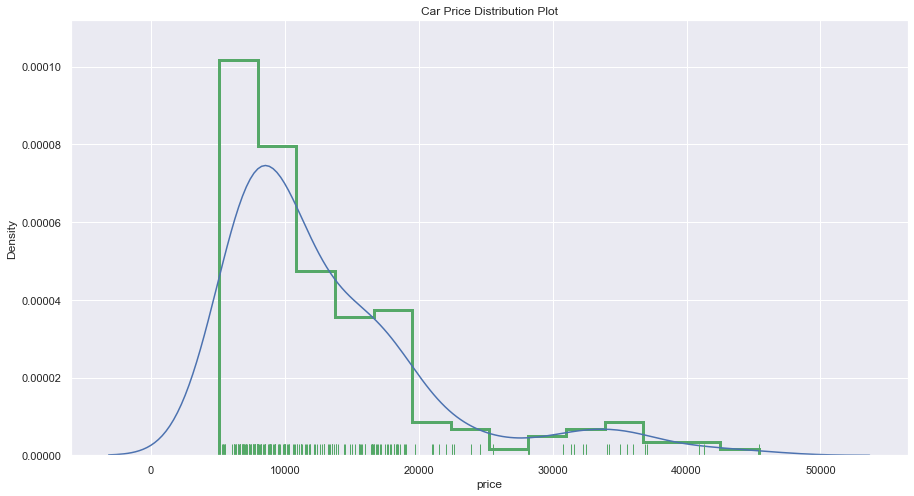

In [14]:
plt.figure(figsize=(15,8))

# plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')

# sns.distplot(car.price, rug=True, color="y")
sns.distplot(car.price, rug=True, rug_kws={"color": "g"},
            hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 1, "color": "g"})

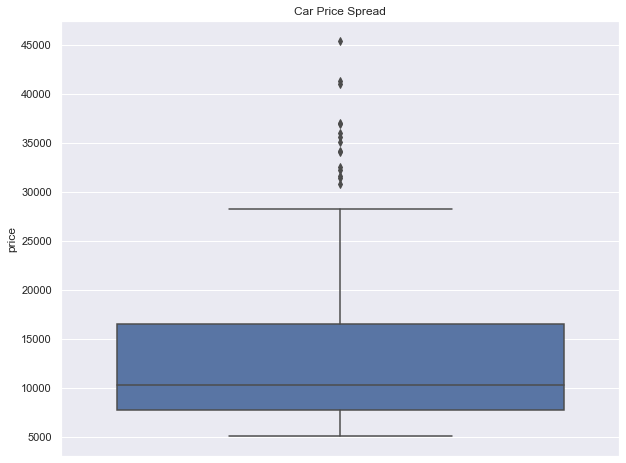

In [15]:
plt.figure(figsize=(10,8))
plt.title('Car Price Spread')
sns.boxplot(y=car.price)

plt.show()

In [16]:
car['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<a>From the aforementioned plots and descriptions, I conclude the following:

- The right-skewed density curve suggests that the majority of prices are low. 
- It is obvious from the boxplot that there is a large disparity between the pricing distribution's mean and median.
- The extreme values that fall above the whiskers in the boxplot indicate outliers, however since our dataset is
  limited, we opt not to deal with outliers. 
- The substantial discrepancy between the 75th percentile and the highest price value also shows outliers.

<b id ='5'> b.) Visualising predictor Variables - Categorical variable

In [17]:
# Segregating data according to datatypes
car_obj = car.select_dtypes(include = 'object')
car_obj.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,make
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [18]:
car_obj.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'make'],
      dtype='object')

Let us observe the impact of these categorical variables on price

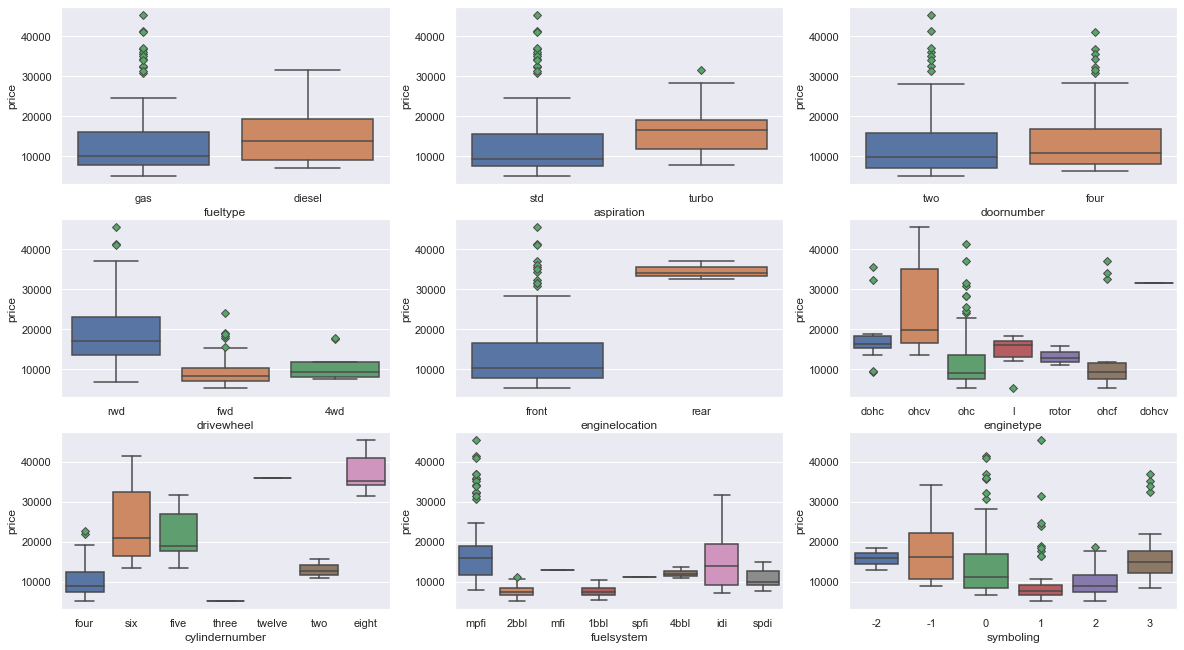

In [19]:
plt.figure(figsize =(20,15))
green_diamond = dict(markerfacecolor='g', marker='D')

plt.subplot(4,3, 1)
sns.boxplot(y='price', x='fueltype', data= car, flierprops=green_diamond)

plt.subplot(4,3, 2)
sns.boxplot(y='price', x='aspiration', data= car, flierprops=green_diamond)

plt.subplot(4,3, 3)
sns.boxplot(y='price', x='doornumber', data= car, flierprops=green_diamond)

plt.subplot(4,3, 4)
sns.boxplot(y='price', x='drivewheel', data= car, flierprops=green_diamond)

plt.subplot(4,3, 5)
sns.boxplot(y='price', x='enginelocation', data= car, flierprops=green_diamond)

plt.subplot(4,3, 6)
sns.boxplot(y='price', x='enginetype', data= car, flierprops=green_diamond)

plt.subplot(4,3, 7)
sns.boxplot(y='price', x='cylindernumber', data= car, flierprops=green_diamond)

plt.subplot(4,3, 8)
sns.boxplot(y='price', x='fuelsystem', data= car, flierprops=green_diamond)

plt.subplot(4,3, 9)
sns.boxplot(y='price', x='symboling', data= car, flierprops=green_diamond)

plt.show()

<a> INFERENCES:<br>
    
 
<A>a.) Symboling
- This ordinal categorical column indicates assigned insurance risk rating. It has values ranging from -2 to 3. These values indicate assigned insurance risk rating, `'-2'` being high risk and `'3'` being pretty safe.
- cars with risk rating `-1` are more expensive
- Cars with insurance risk rating `1` are the cheapest.


b.) Fueltype - Cars with fueltype `DIESEL` are more expensive


c.) Aspiration - Cars with `Turbo` aspiration are more expensive


d.) Doornumber
    
- Although Cras with `four` numbner of doors are more expensive than the ones with 2 number of doors only, there is no significant difference in the price
- Thus this variable does not affect the price much.

e.) Drivewheel - Cars with `rwd` are more expensive than `fwd` cars

f.) Enginelocation
    
- There is significant difference in pricing of cars whose engine is located in `rear` and `front`.
- Cars whose engine is located in the `rear` are much more expensive than the other cars.

g.) Engine type - Cars with engine type `ohcv` are more expensive than the other types of cars.

h.) Cylinder number - Cras with `eight` cylinders are very expensive as compared to other cars.

i.) Fuelsystem - Cars with `idi`or `mpfi` fuelsystem are more expensive as compared to others.


<Figure size 1080x720 with 0 Axes>

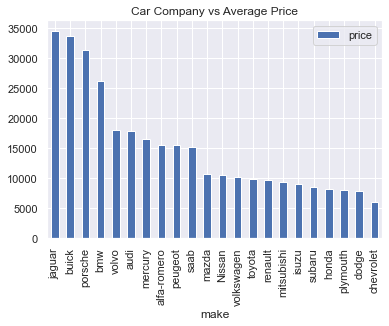

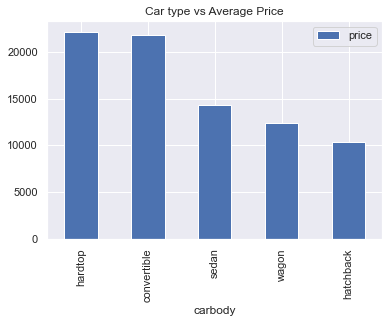

In [20]:
## Let us also observe how brand name and car body affect price

make_gp = car.pivot_table(values = 'price', index = 'make',aggfunc ='mean').sort_values(by ='price', ascending = False)
body_gp = car.pivot_table(values = 'price', index = 'carbody',aggfunc ='mean').sort_values(by ='price', ascending = False)


plt.figure(figsize=(15,10))

make_gp.plot.bar()
plt.title('Car Company vs Average Price')

body_gp.plot.bar()
plt.title('Car type vs Average Price')

plt.show()

<a> INFERENCES:
    
- Cars of the company `jaguar` are among the most expensive cars. Cars of `buick` are also significantly more expensive than the cars by other companies.
- Cars of the type `hardtop` and `convertible` are more pricey than other types of cars.<br><BR>

-----------------------------------------

### <a> SUMMARY:

**<a>From the preceding graphs and conclusions, we may conclude that the following 'categorical predictor variables' have an effect on the 'target variable':<a>**
<A>

1) symboling with -1 rating<br>
2) fueltype - diesel<br>
3) aspiration - turbo<br>
4) drivewheel - rwd<br>
5) carbody - convertible & hardtop <br>
6) make - jaguar & buick<br>
7) fuelsystem - mpfi & idi <br>
8) cylindernumber - eight<br>
9) enginetype - ohcv<br>
10) enginelocation - rear<br> <A>

<b id ='5'> c.) Visualising predictor Variables - Numerical variable

In [21]:
# Segregating data according to datatype
car_num = car.select_dtypes(exclude = 'object')
car_num.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
# Removing unnecessary column
car_num= car_num.drop('car_ID',axis=1)

In [23]:
# Observing the correlation among these numerical predictor variables
car_num.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


 **$Visualising$ $impact$ $of$ $car$ $dimensions$ $on$ $price$ $of$ $the$ $car$**

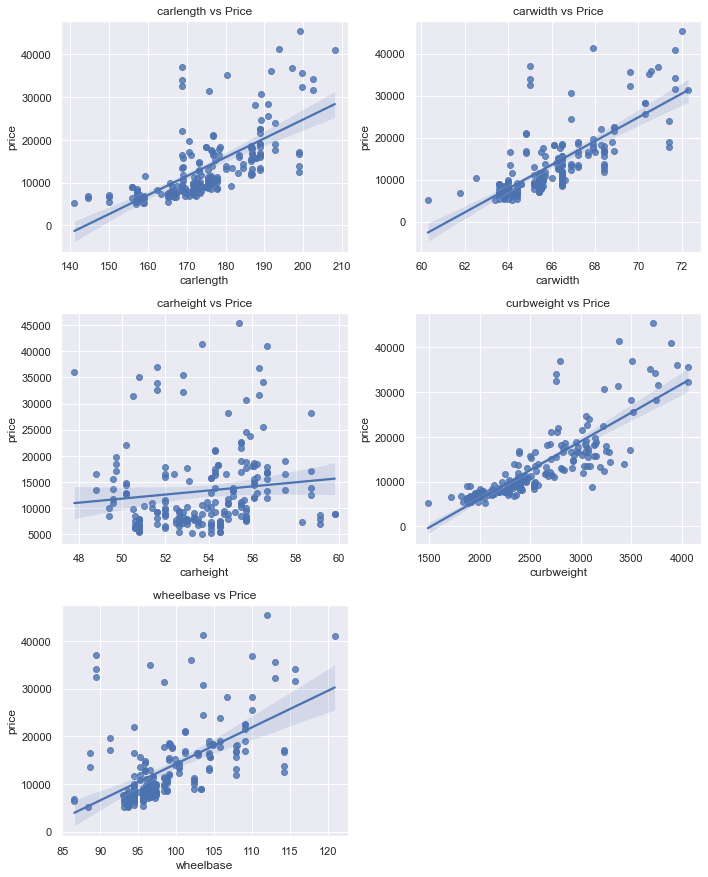

In [24]:
def regplot(x,fig):
    plt.subplot(5,2,fig)
    sns.regplot(car[x],car['price'])
    plt.title(x +' '+'vs Price')
    plt.ylabel('price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

regplot('carlength', 1)
regplot('carwidth', 2)
regplot('carheight', 3)
regplot('curbweight', 4)
regplot('wheelbase', 5)

plt.tight_layout()

<A>OBSERVATIONS:<A><BR>

1) We find that carwidth, curbweight, and wheelbase have a strong positive connection with the dependent variable `price`.<br>
2) The accompanying scatter plots reveal that our dataset has several outliers. Due to the modest size of our dataset, we opt not to manage them.

In [25]:
# Let us observe the correlation among these variables
car_dim = ['carlength','carwidth','carheight','curbweight','wheelbase','price']
car[car_dim].corr()

,carlength,carwidth,carheight,curbweight,wheelbase,price
carlength,1.000000,0.841118,0.491029,0.877728,0.874587,0.682920
carwidth,0.841118,1.000000,0.279210,0.867032,0.795144,0.759325
carheight,0.491029,0.279210,1.000000,0.295572,0.589435,0.119336
curbweight,0.877728,0.867032,0.295572,1.000000,0.776386,0.835305
wheelbase,0.874587,0.795144,0.589435,0.776386,1.000000,0.577816
price,0.682920,0.759325,0.119336,0.835305,0.577816,1.000000


**$Visualising$ $impact$ $of$ $other$ $car$ $features$ $on$ $price$ $of$ $the$ $car$**

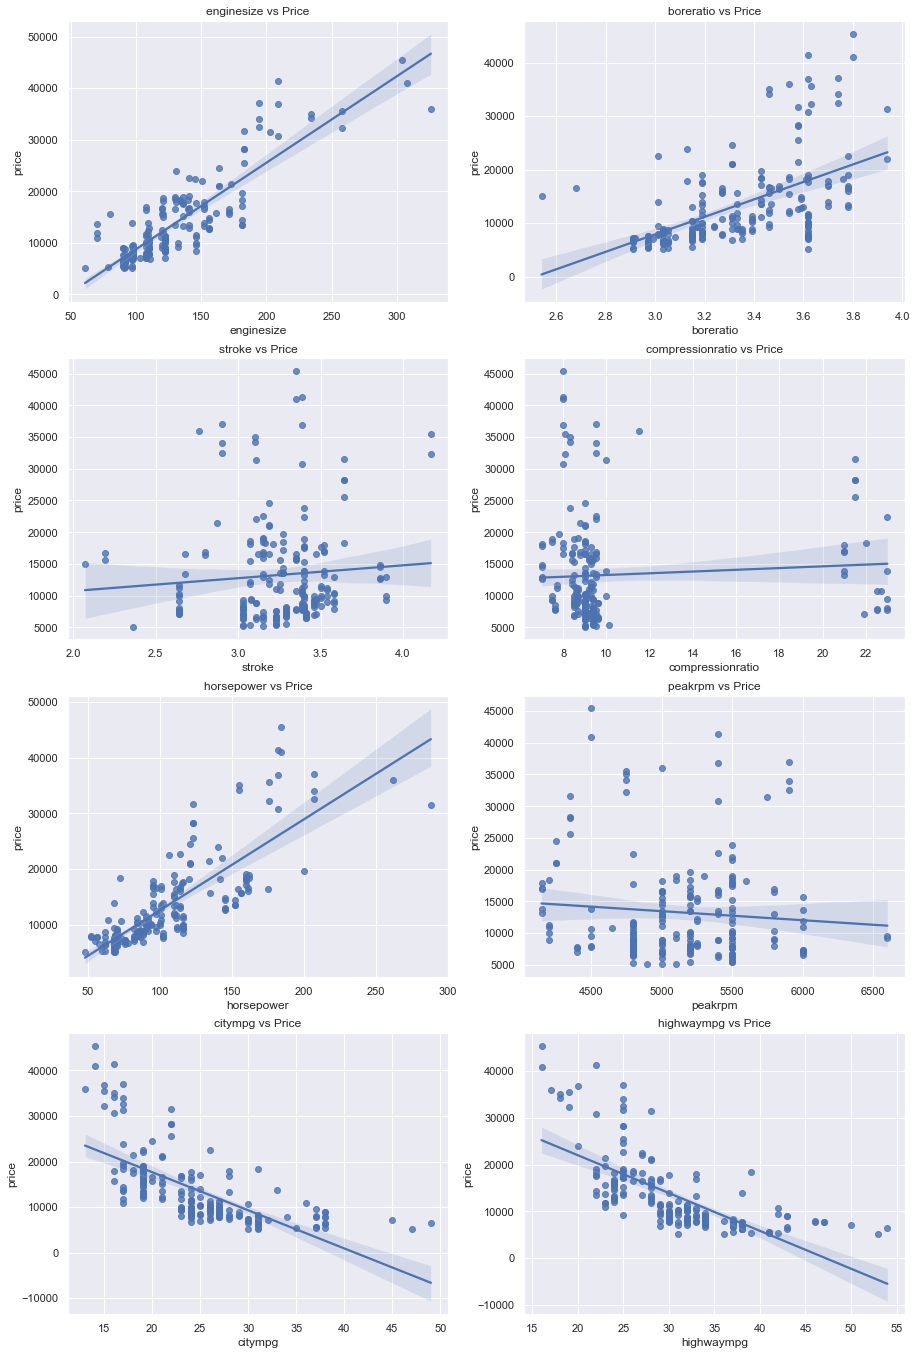

In [26]:
# Other features of the car
plt.figure(figsize=(15,30))

regplot('enginesize',1)
regplot('boreratio',2)
regplot('stroke',3)
regplot('compressionratio',4)
regplot('horsepower',5)
regplot('peakrpm',6)
regplot('citympg',7)
regplot('highwaympg',8)

<A>OBSERVATIONS:<A><BR>
    
1) We discover a strong positive association between engine size and horsepower and the dependent variable -`price`.<br>
2) We discover a strong negative connection between citympg and highwaympg and the dependent variable `price`.<br>
3) The preceding scatter plots reveal that our dataset contains several outliers. Due to the modest size of our dataset, we opt not to manage them.

In [27]:
car_num.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


<a> From the above percentiles, we observe that there are many outliers in our dataset. Since our dataset is small, we choose not to deal with them.

In [28]:
# Let us observe the correlation among these variables
car_features = ['enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
car[car_features].corr()

,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
enginesize,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
peakrpm,-0.244660,-0.254976,-0.067964,-0.435741,0.131073,1.000000,-0.113544,-0.054275,-0.085267
citympg,-0.653658,-0.584532,-0.042145,0.324701,-0.801456,-0.113544,1.000000,0.971337,-0.685751
highwaympg,-0.677470,-0.587012,-0.043931,0.265201,-0.770544,-0.054275,0.971337,1.000000,-0.697599
price,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,1.000000


<A>**SUMMARY:**

From the above regression plots and correlation matrix, we can observe that there are few features that impact the price of the car to a great extent:

1. carlength
2. carwidth
3. curbweight
4. enginesize
5. horsepower
6. citympg
7. highwaympg
8. boreratio
9. wheelbase

Now let us observe the correlation between these important features within themselves as this affects the behaviour of the model.

<AxesSubplot:>

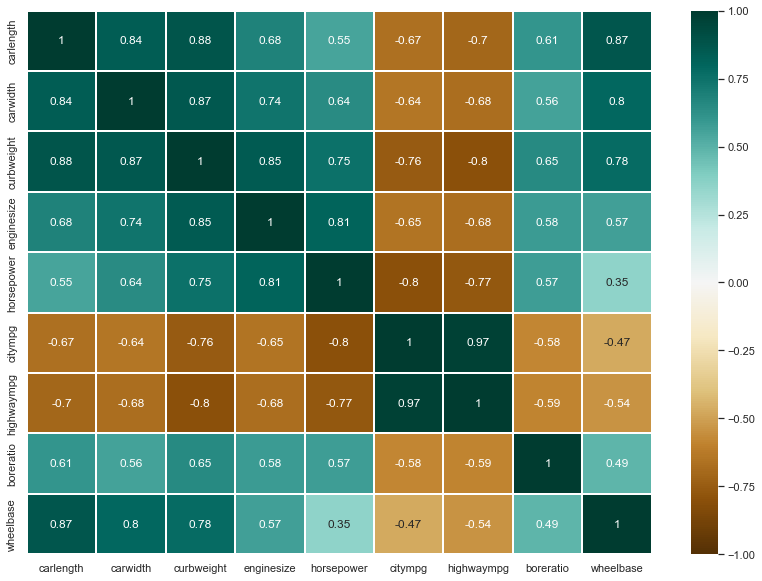

In [29]:
plt.figure(figsize = (14,10))

num_features = ['carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','boreratio','wheelbase']
sns.heatmap(car[num_features].corr(), annot = True,cmap="BrBG" , robust=True,linewidth=0.1, vmin=-1)
# cmap = 'Blues'

### <a> conclusion:

<a>Following is the list of driving predictor variables (Categorical as well as Numerical) that impact pricing of any car:<a>

<a>1) symboling (with -1 rating)<br>
2) fueltype (diesel)<br>
3) aspiration (turbo)<br>
4) drivewheel (rwd)<br>
5) carbody (convertible, hardtop)<br>
6) fuelsystem (mpfi,idi)<br>
7) cylindernumber (eight)<br>
8) enginetype (ohcv)<br>
9) enginelocation (rear)<br>
10) carlength<br>
11) carwidth<br>
12) curbweight<br>
13) enginesize<br>
14) horsepower<br>
15) citympg<br>
16) highwaympg<br>
17) boreratio<br>
18) wheelbase<br>

<A>



### Feature Selection for model building

From the preceding plots and explanation, let's identify a few significant factors that significantly impact price (the goal variable). This first manual feature selection aids in the development of a good model.

In [30]:
car_lm = car[['symboling','fueltype','aspiration','drivewheel','carbody','cylindernumber',
                'enginetype','enginelocation','carlength','carwidth','curbweight','enginesize','horsepower','citympg',
                'highwaympg','boreratio','wheelbase','make','price']]
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,boreratio,wheelbase,make,price
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,13495.0
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,21,27,3.47,88.6,alfa-romero,16500.0
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,19,26,2.68,94.5,alfa-romero,16500.0
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,24,30,3.19,99.8,audi,13950.0
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,18,22,3.19,99.4,audi,17450.0


In [31]:
car_lm.shape

(205, 19)

<a> 19 features are chosen out of a total of 25. Let's go on to the next phase, which is model construction.

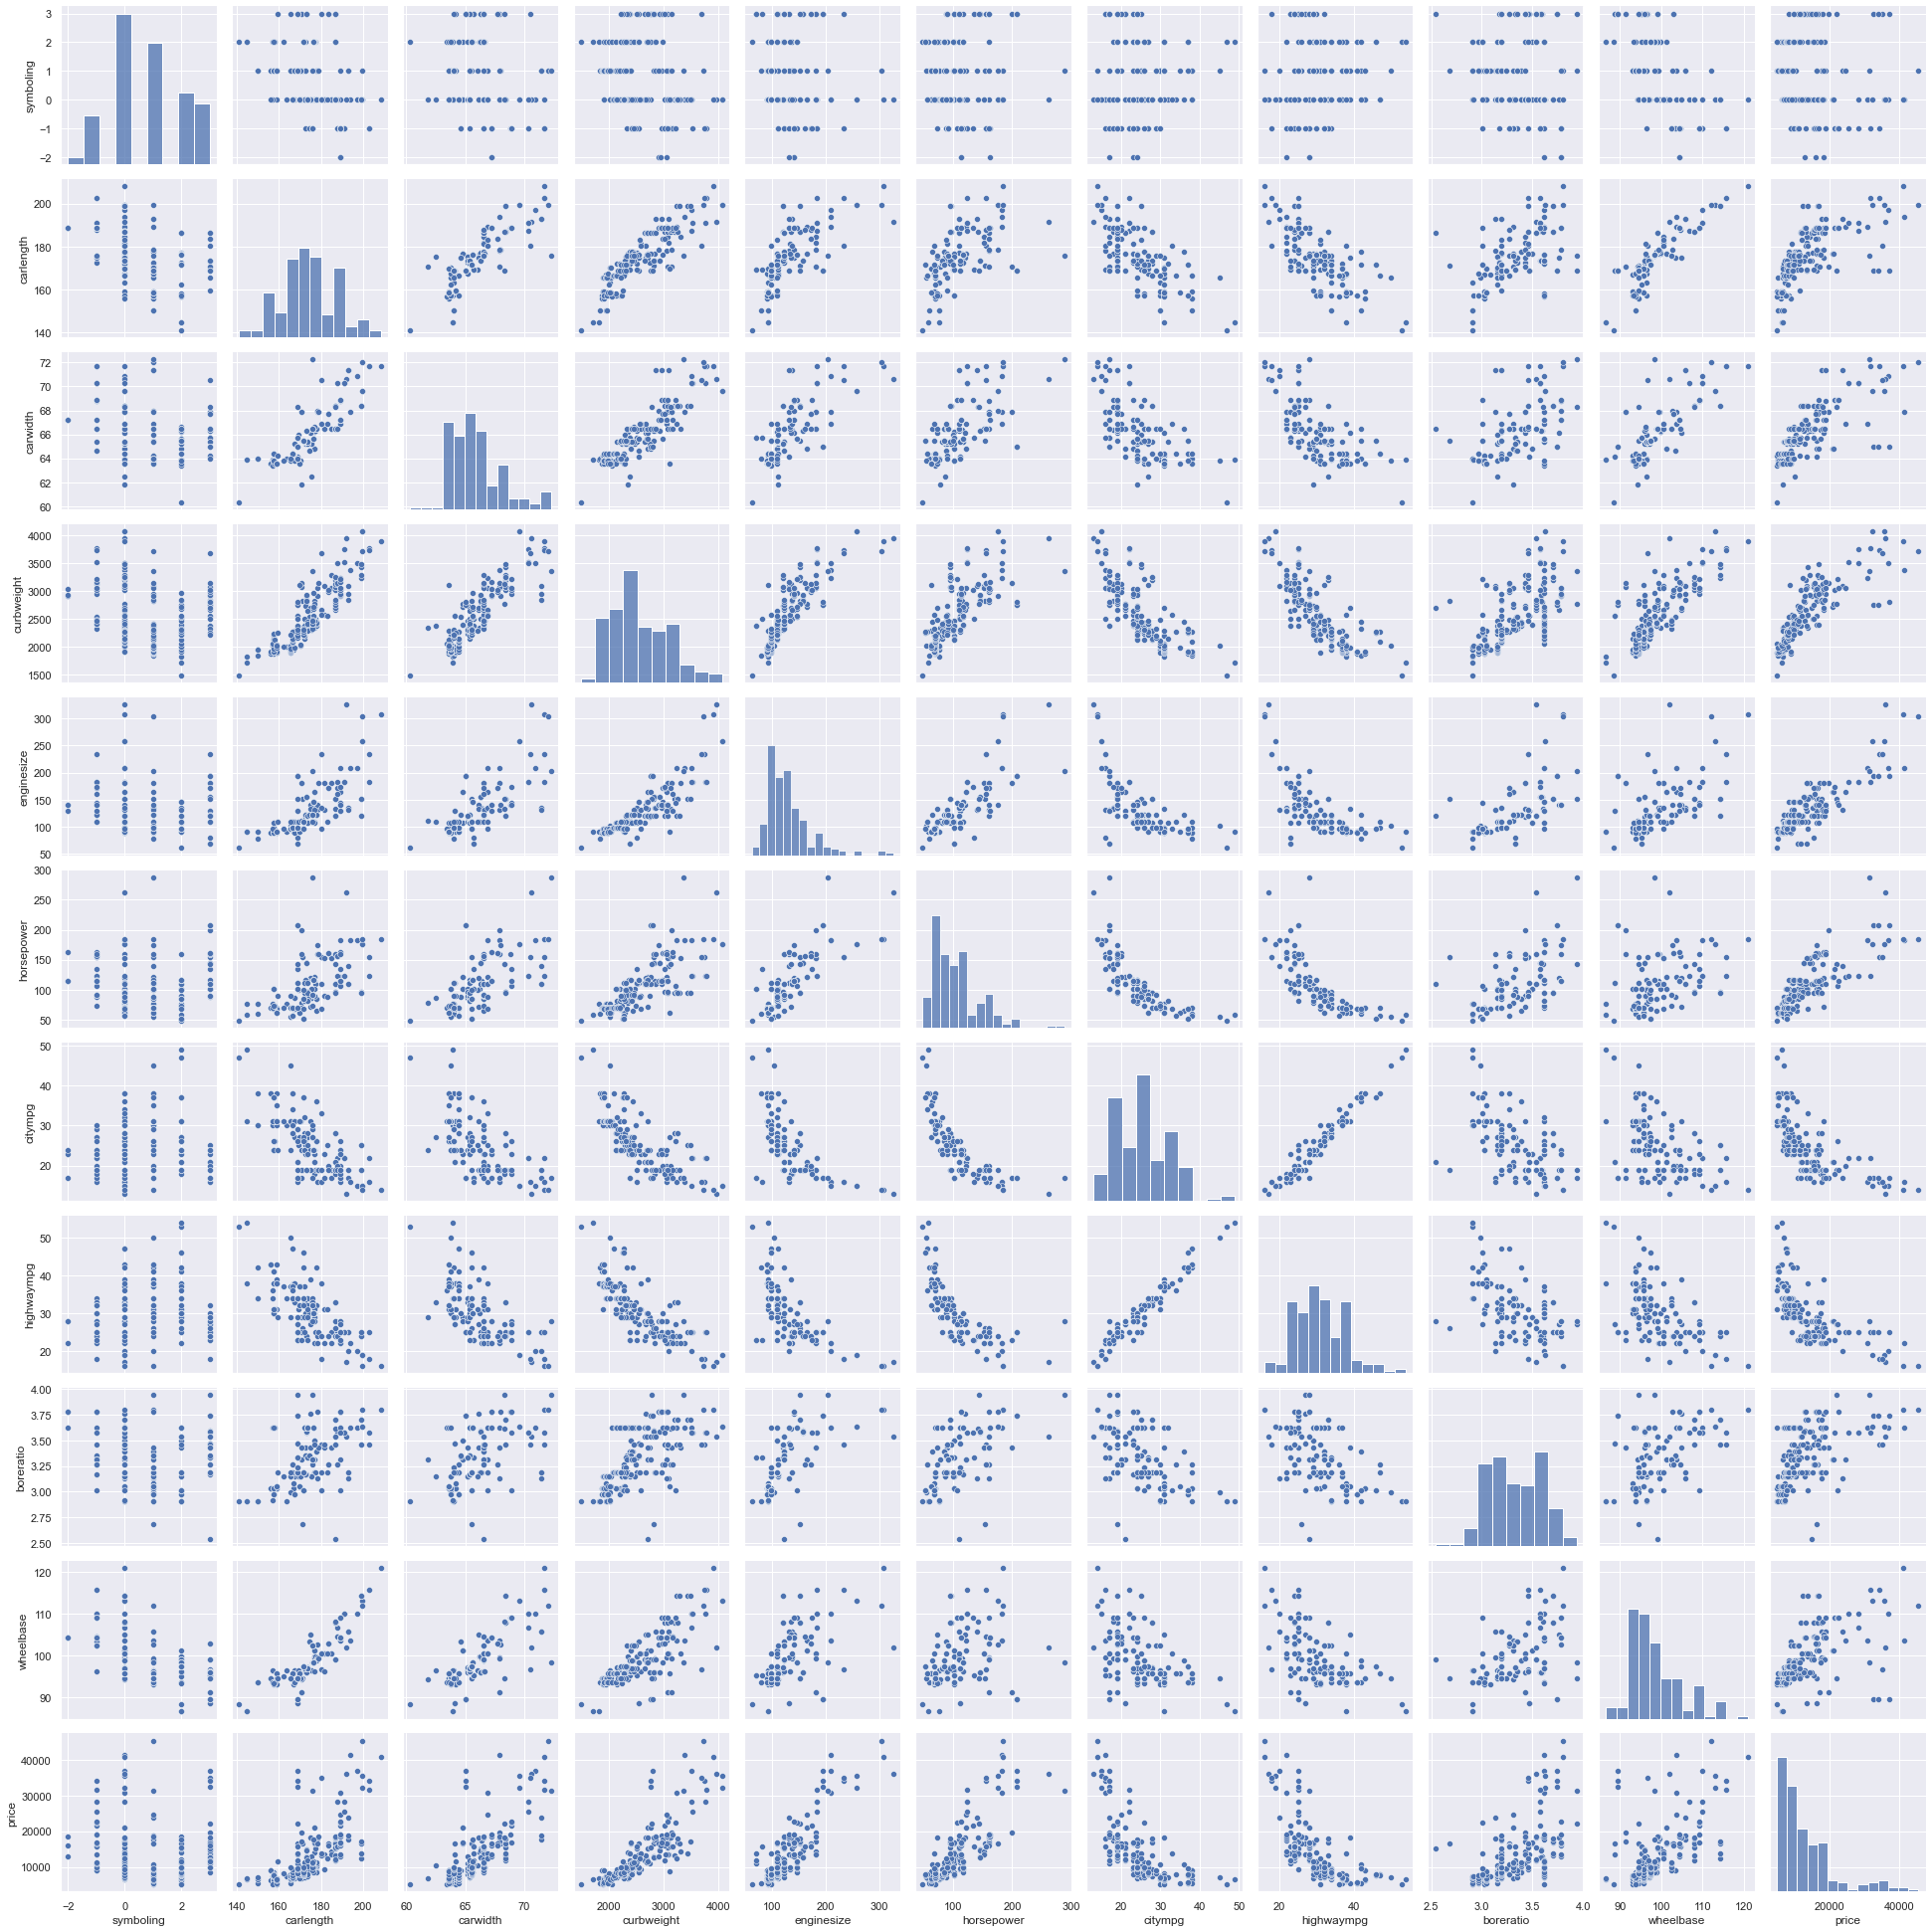

In [32]:
# Let us observe correlation among these selected features
sns.pairplot(car_lm , palette="dark green")
plt.show()

## <b id ='6'>6. Data preparation 
    
Let's now modify our data so that our model can account for all the significant automotive characteristics that have an impact on the dependent variable. I'll take the following actions:

1) Deriving new metrics<br>
2) Ordinal categorical variables <br>
3) Creating dummy variables<br>

----------------------------------------------------------------------

<b id ='6'> a.) Deriving new metrics

We understand, based on business-driven information, that the mileage of a vehicle is a major element in determining its price. Since mileage is directly linked to a vehicle's fuel consumption, it is imperative that we take it into account while developing the model to anticipate automobile pricing. City mileage and highway mileage are two of the most influential pricing considerations. However, since these variables are associated with one another and with a large number of other predictor factors, their inclusion renders the model unstable. Let's create a new statistic known as `Fuel Economy` that describes both of these factors.

We are aware that the Combined fuel efficiency is a weighted average of the City and Highway MPG values computed by weighting the City value by 55% and the Highway value by 45%. Therefore,

Fuel efficiency = 0.45 times highway mileage plus 0.55 times city mileage

(Reference - https://www.epa.gov/fueleconomy/text-version-gasoline-label)

In [33]:
car_lm['fuel_economy'] = (0.45 * car_lm['highwaympg']) + (0.55 * car_lm['citympg'])

# dropping citympg and highwaympg from the dataset
car_lm = car_lm.drop(['citympg','highwaympg'],axis=1)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,make,price,fuel_economy
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero,13495.0,23.70
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,alfa-romero,16500.0,23.70
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,alfa-romero,16500.0,22.15
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,audi,13950.0,26.70
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,audi,17450.0,19.80


From the visualisation of categorical variables, we observe that car company is also the governing factor for predicting the price of the car. Luxury cars seem more expensive

In [34]:
make_gp = car.pivot_table(values = 'price', index = 'make',aggfunc ='mean').sort_values(by ='price', ascending = False)
make_gp['price-1'] = make_gp['price']
make_gp = make_gp.drop('price',axis=1)
make_gp

,price-1
make,
jaguar,34600.000000
buick,33647.000000
porsche,31400.500000
bmw,26118.750000
volvo,18063.181818
audi,17859.166714
mercury,16503.000000
alfa-romero,15498.333333
peugeot,15489.090909


In [35]:
make_gp = car_lm.merge(make_gp.reset_index(), how='left',on='make')

bins = np.linspace(min(make_gp['price-1']), max(make_gp['price-1']),4)

bin_name=['Economic','Medium','Luxury']

car_lm['class'] = pd.cut(make_gp['price-1'], bins, right=False, labels = bin_name, include_lowest = True)

# converting datatype of class to object
car_lm['class'] = car_lm['class'].astype(object)

#dropping the column make from the dataset
car_lm = car_lm.drop('make',axis =1)

car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,3,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,1,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,2,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium
4,2,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium


<b id ='6'> b.) Ordinal categorical variables

We observe that the column `symboling` has values ranging from -3 to 3. These values indicate assigned insurance risk rating, `'-3'` being high risk and `'3` being pretty safe. Let us scale of the ratings. Let us denote`-3` i.e. `high risk` as `0`,`-2` i.e. `medium risk` as `1` and so on. Thus, now our symboling column is in the range 0 to 6 where 0 denotes high risk and 6 denotes pretty safe.

In [36]:
rating_dict = {-3: 0,-2:1 ,-1: 2, 0: 3,1: 4,2: 5,3: 6}

car_lm['symboling'] = car_lm['symboling'].map(rating_dict)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class
0,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic
1,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic
2,4,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic
3,5,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium
4,5,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium


<b id ='6'> c.) Creating Dummy Variables <br>
    
Let us create dummy variables for categorical columns to see which feature has significant influence on price.

In [37]:
dum = car_lm.select_dtypes(include = 'object')
dummy = pd.get_dummies(dum, prefix=["fuel","aspiration","drive","body","cylindernum","engine",
                                         "engineloc" ,'class'], drop_first = True)
dummy.head()

,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [38]:
dummy.shape

(205, 23)

<a> We create 23 new dummy columns describingrespective categorical columns.

In [39]:
# Add the results to the original car dataframe

car_lm = pd.concat([car_lm, dummy], axis = 1)
car_lm.head()

,symboling,fueltype,aspiration,drivewheel,carbody,cylindernumber,enginetype,enginelocation,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,class,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,Economic,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,gas,std,rwd,convertible,four,dohc,front,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,Economic,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,gas,std,rwd,hatchback,six,ohcv,front,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,Economic,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,5,gas,std,fwd,sedan,four,ohc,front,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,Medium,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,gas,std,4wd,sedan,five,ohc,front,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,Medium,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [40]:
# drop duplicate columns
del_list = dum.columns
car_lm = car_lm.drop(del_list, axis = 1)
car_lm.head()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
0,6,168.8,64.1,2548,130,111,3.47,88.6,13495.0,23.70,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,168.8,64.1,2548,130,111,3.47,88.6,16500.0,23.70,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,171.2,65.5,2823,152,154,2.68,94.5,16500.0,22.15,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,5,176.6,66.2,2337,109,102,3.19,99.8,13950.0,26.70,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,176.6,66.4,2824,136,115,3.19,99.4,17450.0,19.80,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [41]:
car_lm.shape
print("Our Final dataset has",car_lm.shape[0],'number of rows')
print("Our Final dataset has",car_lm.shape[1],'number of columns')

Our Final dataset has 205 number of rows
Our Final dataset has 33 number of columns


 ## <b id ='7'>7. Splitting the Data and feature scaling
    
Two important steps are followed in this part of model building:<br>
1) The entire dataset is split in Training and test set(70-30).<br>
2) Normalisation of numeric variables<br>
3) Dividing the training datset into target and predictor variables.

<b id ='7'> a.) Train-Test split data

In [42]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
car_train, car_test = train_test_split(car_lm, train_size = 0.7, test_size = 0.3, random_state = 100)

<b id ='7'> b.) Feature scaling- Minmax scaling (normalisation)

In [43]:
# Applying scaler() to all the columns except the 'binary' and 'dummy' variables
num_vars = ['symboling','carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
           'boreratio', 'wheelbase', 'price', 'fuel_economy']

scaler = MinMaxScaler()
car_train[num_vars] = scaler.fit_transform(car_train[num_vars])

car_train.head()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
122,0.6,0.426016,0.291667,0.272692,0.139623,0.083333,0.230159,0.244828,0.068818,0.530864,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
125,1.0,0.452033,0.666667,0.500388,0.339623,0.395833,1.000000,0.272414,0.466890,0.213992,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
166,0.6,0.448780,0.308333,0.314973,0.139623,0.266667,0.444444,0.272414,0.122110,0.344307,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.450407,0.316667,0.411171,0.260377,0.262500,0.626984,0.068966,0.314446,0.244170,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.2,0.775610,0.575000,0.647401,0.260377,0.475000,0.746032,0.610345,0.382131,0.122085,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [44]:
# Let us observe the scaled data
car_train.describe()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.525476,0.461655,0.407878,0.241351,0.227302,0.497946,0.411141,0.219310,0.358265,0.909091,0.181818,0.594406,0.349650,0.020979,0.342657,0.475524,0.132867,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.006993,0.097902,0.076923
std,0.239200,0.204848,0.184517,0.211269,0.154619,0.165511,0.207140,0.205581,0.215682,0.185980,0.288490,0.387050,0.492733,0.478536,0.143818,0.476266,0.501156,0.340624,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.083624,0.298227,0.267406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.399187,0.304167,0.245539,0.135849,0.091667,0.305556,0.272414,0.067298,0.198903,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.502439,0.425000,0.355702,0.184906,0.191667,0.500000,0.341379,0.140343,0.344307,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.669919,0.550000,0.559542,0.301887,0.283333,0.682540,0.503448,0.313479,0.512346,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a> We can observe that after scaling, our data now falls between the range 0 and 1.

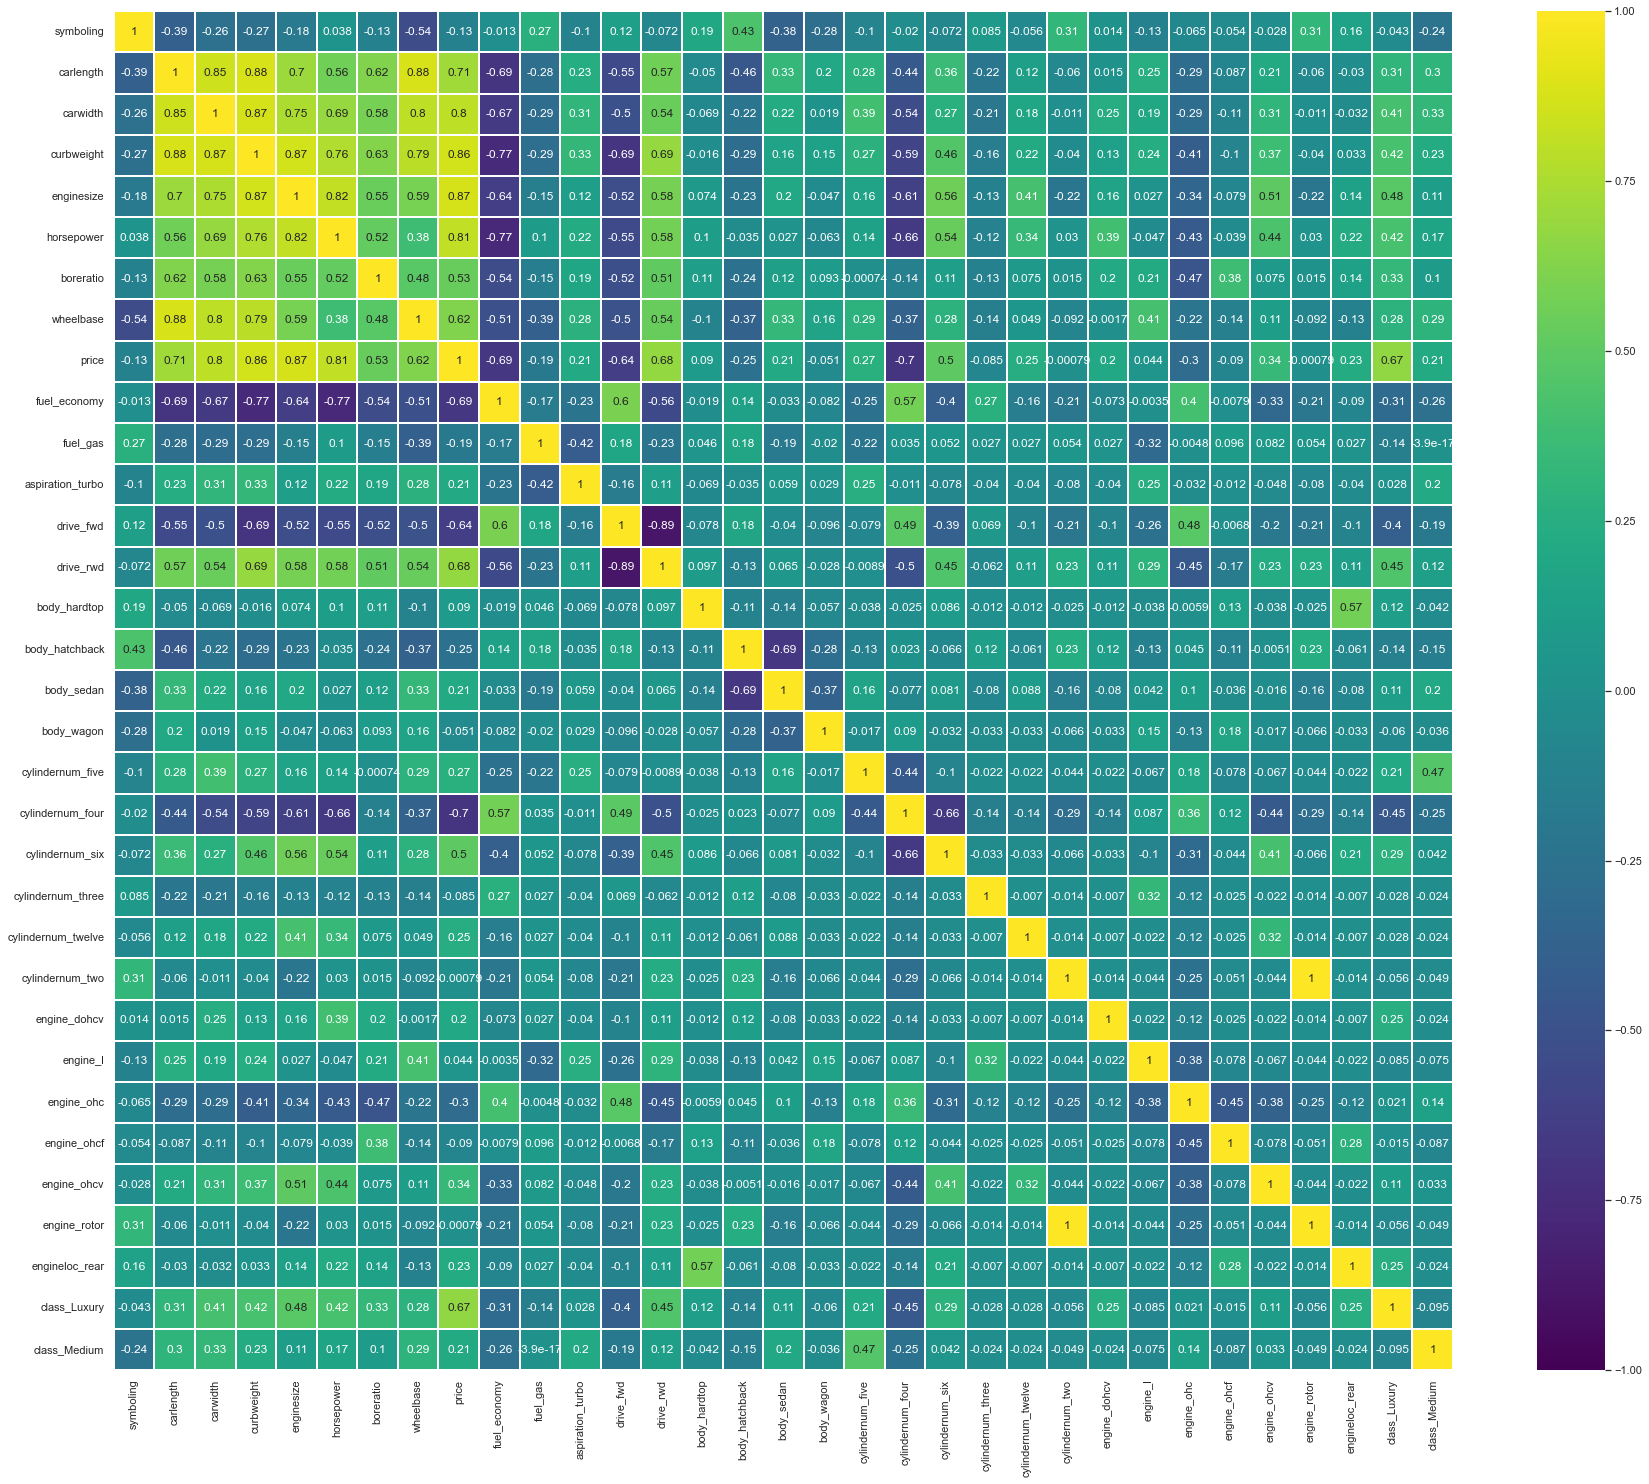

In [45]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
# sns.heatmap(car_train.corr(), annot = True, cmap="YlGnBu")

sns.heatmap(car_train.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)
plt.show()

<b id ='7'> c .) Dividing train set into X and Y sets for the model building

In [46]:
y_train = car_train.pop('price')
X_train = car_train

 ## <b id ='8'>8. Building a linear regression model 

We will be using Recursive feature elimination technique(RFE)

<b id ='8'> a.) Adopting RFE technique to select the features 

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)                # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 7),
 ('carlength', False, 16),
 ('carwidth', False, 2),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('horsepower', True, 1),
 ('boreratio', True, 1),
 ('wheelbase', True, 1),
 ('fuel_economy', True, 1),
 ('fuel_gas', False, 14),
 ('aspiration_turbo', False, 15),
 ('drive_fwd', False, 11),
 ('drive_rwd', False, 12),
 ('body_hardtop', True, 1),
 ('body_hatchback', True, 1),
 ('body_sedan', True, 1),
 ('body_wagon', True, 1),
 ('cylindernum_five', False, 5),
 ('cylindernum_four', False, 3),
 ('cylindernum_six', False, 4),
 ('cylindernum_three', True, 1),
 ('cylindernum_twelve', False, 13),
 ('cylindernum_two', True, 1),
 ('engine_dohcv', False, 10),
 ('engine_l', False, 8),
 ('engine_ohc', False, 17),
 ('engine_ohcf', False, 6),
 ('engine_ohcv', False, 9),
 ('engine_rotor', True, 1),
 ('engineloc_rear', True, 1),
 ('class_Luxury', True, 1),
 ('class_Medium', True, 1)]

In [49]:
# List of columns selected by RFE technique
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'enginesize', 'horsepower', 'boreratio', 'wheelbase',
       'fuel_economy', 'body_hardtop', 'body_hatchback', 'body_sedan',
       'body_wagon', 'cylindernum_three', 'cylindernum_two', 'engine_rotor',
       'engineloc_rear', 'class_Luxury', 'class_Medium'],
      dtype='object')

<b id ='8'> b.) Building model using statsmodel, for the detailed statistics

### `MODEL 1`

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_1 = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_1)

lm_1 = sm.OLS(y_train,X_train_1).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     123.6
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           4.62e-68
Time:                        14:00:40   Log-Likelihood:                 213.36
No. Observations:                 143   AIC:                            -394.7
Df Residuals:                     127   BIC:                            -347.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0441      0.04

In [51]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_1.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cylindernum_two,inf
12,engine_rotor,inf
0,curbweight,64.98
1,enginesize,30.43
4,wheelbase,27.79
2,horsepower,19.35
8,body_sedan,18.17
5,fuel_economy,12.62
7,body_hatchback,12.54
3,boreratio,11.14


`curbweight` has high VIF so it can be dropped

### `MODEL 2`

In [52]:
X_train_2 = X_train_1.drop(["curbweight"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_2 = sm.add_constant(X_train_2)

lm_2 = sm.OLS(y_train,X_train_2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     121.9
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           8.64e-67
Time:                        14:00:49   Log-Likelihood:                 207.30
No. Observations:                 143   AIC:                            -384.6
Df Residuals:                     128   BIC:                            -340.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0059      0.04

In [53]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,cylindernum_two,inf
11,engine_rotor,inf
0,enginesize,21.29
7,body_sedan,17.91
1,horsepower,17.56
3,wheelbase,15.42
4,fuel_economy,12.62
6,body_hatchback,12.42
2,boreratio,10.38
8,body_wagon,5.54


`enginesize` has high VIF so it can be dropped

### `MODEL 3`

In [54]:
X_train_3 = X_train_2.drop(["enginesize"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_3 = sm.add_constant(X_train_3)

lm_3 = sm.OLS(y_train,X_train_3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     92.98
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           7.13e-59
Time:                        14:00:52   Log-Likelihood:                 184.18
No. Observations:                 143   AIC:                            -340.4
Df Residuals:                     129   BIC:                            -298.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0456      0.05

In [55]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,cylindernum_two,inf
10,engine_rotor,inf
6,body_sedan,17.17
3,fuel_economy,12.09
5,body_hatchback,11.66
2,wheelbase,11.28
1,boreratio,10.27
0,horsepower,7.45
7,body_wagon,5.14
4,body_hardtop,2.20


In [56]:
# Let us check correlation between the features to decide which has highest multicollinearity
X.corr()

,horsepower,boreratio,wheelbase,fuel_economy,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_three,cylindernum_two,engine_rotor,engineloc_rear,class_Luxury,class_Medium
horsepower,1.000000,0.518307,0.382758,-0.771285,0.103970,-0.035389,0.026685,-0.063235,-0.115652,0.029774,0.029774,0.221431,0.421633,0.166357
boreratio,0.518307,1.000000,0.482386,-0.541146,0.110272,-0.244359,0.117691,0.093406,-0.128229,0.014733,0.014733,0.139578,0.329893,0.100748
wheelbase,0.382758,0.482386,1.000000,-0.510040,-0.103235,-0.371606,0.333352,0.162160,-0.142992,-0.092032,-0.092032,-0.127454,0.283107,0.294840
fuel_economy,-0.771285,-0.541146,-0.510040,1.000000,-0.018609,0.144117,-0.032740,-0.081784,0.271328,-0.208336,-0.208336,-0.090173,-0.309403,-0.262215
body_hardtop,0.103970,0.110272,-0.103235,-0.018609,1.000000,-0.105689,-0.139386,-0.057301,-0.012284,-0.024832,-0.024832,0.573270,0.115968,-0.042258
body_hatchback,-0.035389,-0.244359,-0.371606,0.144117,-0.105689,1.000000,-0.687477,-0.282618,0.116231,0.234957,0.234957,-0.060588,-0.138688,-0.153126
body_sedan,0.026685,0.117691,0.333352,-0.032740,-0.139386,-0.687477,1.000000,-0.372726,-0.079906,-0.161527,-0.161527,-0.079906,0.110383,0.198071
body_wagon,-0.063235,0.093406,0.162160,-0.081784,-0.057301,-0.282618,-0.372726,1.000000,-0.032849,-0.066403,-0.066403,-0.032849,-0.059629,-0.035684
cylindernum_three,-0.115652,-0.128229,-0.142992,0.271328,-0.012284,0.116231,-0.079906,-0.032849,1.000000,-0.014236,-0.014236,-0.007042,-0.027646,-0.024225
cylindernum_two,0.029774,0.014733,-0.092032,-0.208336,-0.024832,0.234957,-0.161527,-0.066403,-0.014236,1.000000,1.000000,-0.014236,-0.055885,-0.048970


`fuel_economy` seems to have correlation with other features.Dropping this will improve the VIF of the model.

### `MODEL 4`

In [57]:
X_train_4 = X_train_3.drop(["fuel_economy"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_4 = sm.add_constant(X_train_4)

lm_4 = sm.OLS(y_train,X_train_4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     99.48
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           2.25e-59
Time:                        14:00:57   Log-Likelihood:                 182.88
No. Observations:                 143   AIC:                            -339.8
Df Residuals:                     130   BIC:                            -301.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0942      0.03

In [58]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,cylindernum_two,inf
9,engine_rotor,inf
2,wheelbase,10.36
1,boreratio,10.08
5,body_sedan,5.37
0,horsepower,5.00
4,body_hatchback,2.92
6,body_wagon,2.45
10,engineloc_rear,1.71
3,body_hardtop,1.68


`body_hardtop` has high p-value; can be dropped

### `MODEL 5`

In [59]:
X_train_5 = X_train_4.drop(["body_hardtop"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_5 = sm.add_constant(X_train_5)

lm_5 = sm.OLS(y_train,X_train_5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           2.81e-58
Time:                        14:01:00   Log-Likelihood:                 177.49
No. Observations:                 143   AIC:                            -331.0
Df Residuals:                     131   BIC:                            -295.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0282      0.03

In [60]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_5.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernum_two,inf
8,engine_rotor,inf
2,wheelbase,10.19
1,boreratio,9.60
0,horsepower,4.99
4,body_sedan,4.96
3,body_hatchback,2.74
5,body_wagon,2.31
10,class_Luxury,1.58
11,class_Medium,1.29


`engine_rotor` has high p-value; can be dropped

### `MODEL 6`

In [61]:
X_train_6 = X_train_5.drop(["engine_rotor"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_6 = sm.add_constant(X_train_6)

lm_6 = sm.OLS(y_train,X_train_6).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           2.81e-58
Time:                        14:01:04   Log-Likelihood:                 177.49
No. Observations:                 143   AIC:                            -331.0
Df Residuals:                     131   BIC:                            -295.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0282      0.03

In [62]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_6.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,wheelbase,10.19
1,boreratio,9.60
0,horsepower,4.99
4,body_sedan,4.96
3,body_hatchback,2.74
5,body_wagon,2.31
9,class_Luxury,1.58
10,class_Medium,1.29
8,engineloc_rear,1.21
7,cylindernum_two,1.10


`engineloc_rear` has high p-value; can be dropped

### `MODEL 7`

In [63]:
X_train_7 = X_train_6.drop(["engineloc_rear"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_7 = sm.add_constant(X_train_7)

lm_7 = sm.OLS(y_train,X_train_7).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     110.5
Date:                Mon, 10 Oct 2022   Prob (F-statistic):           4.33e-59
Time:                        14:01:08   Log-Likelihood:                 176.93
No. Observations:                 143   AIC:                            -331.9
Df Residuals:                     132   BIC:                            -299.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0374      0.03

In [64]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_7.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,wheelbase,9.71
1,boreratio,9.28
4,body_sedan,4.93
0,horsepower,4.86
3,body_hatchback,2.70
5,body_wagon,2.31
8,class_Luxury,1.53
9,class_Medium,1.29
7,cylindernum_two,1.10
6,cylindernum_three,1.04




<A>**None of the VIF's are above 5 and from the summary we can see that none of them have significant p-value (> 0.05). So we can conclude that this is our final model.**

## 9. Residual Analysis of the train data

a.) Normal Distribution of error terms<br>
    
    
To check if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [65]:
y_train_pred = lm_7.predict(X_train_7)

Text(0.5, 0, 'Errors')

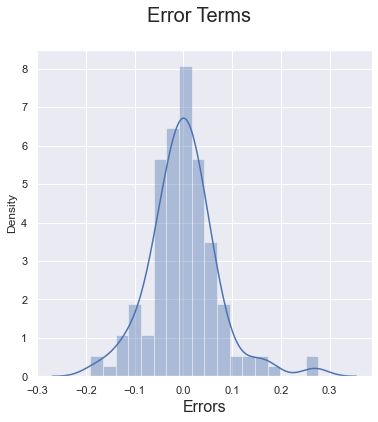

In [66]:
# plot the histogram of the error terms
fig = plt.figure(figsize=(6,6))
sns.distplot((y_train - y_train_pred), bins = 18)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 16)                         # X-label

**b.) Tests for Heteroscedasticity**

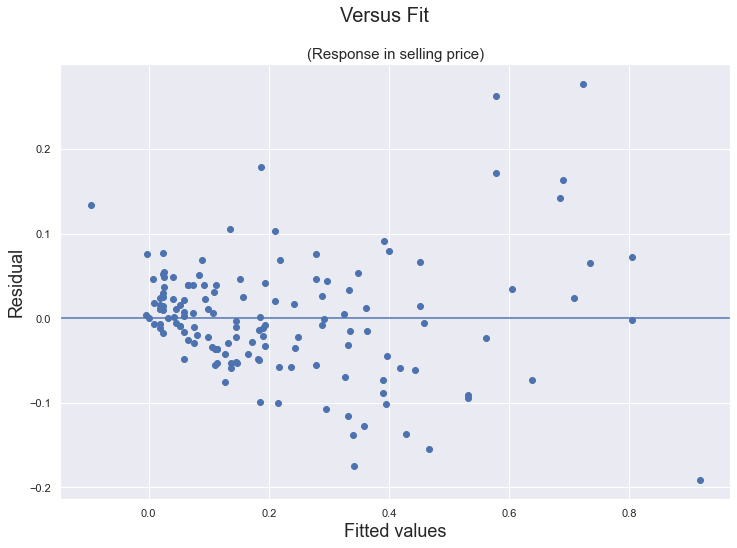

In [67]:
resid = lm_7.resid
fig = plt.figure(figsize = (12,8))
plt.scatter(y_train_pred, resid)
fig.suptitle('Versus Fit', fontsize = 20)  
plt.title('(Response in selling price)',  fontsize = 15)       
plt.xlabel('Fitted values', fontsize = 18)
plt.ylabel('Residual', fontsize = 18)           
plt.axhline(0, 0,8)
plt.show()

<a>I see residuals to be randomly distributed, with no discernible pattern present. Thus, the homoscedasticity condition of linear regression for residual terms is met.

## 10. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, let us now make predictions using our final model.

#### Applying the scaling on the test sets

In [68]:
num_vars = ['symboling','carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
           'boreratio', 'wheelbase', 'price', 'fuel_economy']

car_test[num_vars] = scaler.transform(car_test[num_vars])

In [69]:
car_test.describe()

,symboling,carlength,carwidth,curbweight,enginesize,horsepower,boreratio,wheelbase,price,fuel_economy,fuel_gas,aspiration_turbo,drive_fwd,drive_rwd,body_hardtop,body_hatchback,body_sedan,body_wagon,cylindernum_five,cylindernum_four,cylindernum_six,cylindernum_three,cylindernum_twelve,cylindernum_two,engine_dohcv,engine_l,engine_ohc,engine_ohcf,engine_ohcv,engine_rotor,engineloc_rear,class_Luxury,class_Medium
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.0,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000
mean,0.583871,0.559481,0.480376,0.428470,0.265673,0.248858,0.556580,0.437764,0.239439,0.344661,0.887097,0.177419,0.564516,0.419355,0.080645,0.338710,0.451613,0.096774,0.032258,0.854839,0.080645,0.0,0.0,0.0,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.032258,0.112903,0.129032
std,0.271724,0.189947,0.165440,0.179488,0.162820,0.163376,0.228484,0.212861,0.233076,0.175037,0.319058,0.385142,0.499868,0.497482,0.274512,0.477134,0.501716,0.298064,0.178127,0.355139,0.274512,0.0,0.0,0.0,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.178127,0.319058,0.337972
min,0.000000,0.056911,0.183333,0.128394,0.067925,0.016667,-0.111111,0.000000,0.007763,0.002743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.400000,0.459350,0.358333,0.305275,0.177358,0.107292,0.404762,0.313793,0.092342,0.192387,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.600000,0.547967,0.441667,0.406129,0.226415,0.218750,0.563492,0.387931,0.158991,0.326475,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.800000,0.719919,0.516667,0.564876,0.316038,0.295833,0.746032,0.570690,0.317243,0.451303,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1.000000,1.089431,0.975000,0.935609,0.932075,0.662500,0.888889,1.182759,1.112855,0.747599,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [70]:
y_test = car_test.pop('price')
X_test = car_test

In [71]:
col=X_train_7.columns[1:]
X_test_7 = X_test[col]

In [72]:
# Adding a constant variable 
import statsmodels.api as sm  
X_test_7 = sm.add_constant(X_test_7)

In [73]:
X_test_7.shape

(62, 11)

In [74]:
# making predictions usingthe final model
y_pred_7 = lm_7.predict(X_test_7)

In [75]:
# Evaluate the r2
from sklearn.metrics import r2_score
r2 = r2_score(y_true = y_train, y_pred = y_train_pred)
print('Coefficient of determination for train data: %.3f' % r2) 

r2 = r2_score(y_true = y_test, y_pred = y_pred_7)
print('Coefficient of determination for test data: %.3f' % r2) 



Coefficient of determination for train data: 0.893
Coefficient of determination for test data: 0.887


**Since `R2 for train set is 0.875` and `R2 for test set is 0.882`, we can say that what the model has learnt on the training set, it has been able to generalise very well on the test set as well.**

In [76]:
#RMSE mean for test dataset
import math
from sklearn.metrics import mean_squared_error
Rmse = math.sqrt(mean_squared_error(y_test, y_pred_7)) 
print('Root mean square error: %.3f' % Rmse) 

Root mean square error: 0.078


The RMSE is analogous to the standard deviation and is a measure of how large your residuals are spread out. Since error is very low, we can say that our model is performing very well.

## 11. Model Evaluation

Let's now plot the graph for actual versus predicted values.

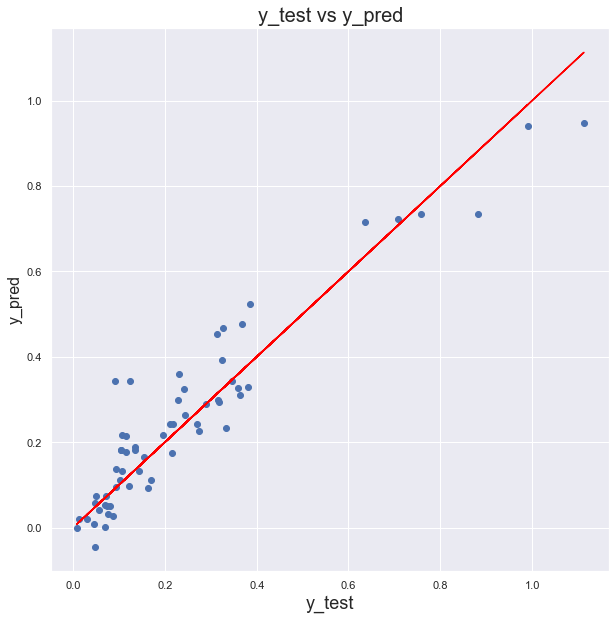

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred_7)
plt.title('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.plot(y_test, y_test, color="red")

<a>It seems that the anticipated numbers are rather accurate. The correlation between actual results and anticipated scores is almost flawless. We could get a better relationship if we dealt with the outliers, but as our dataset is limited, we chose not to since we may lose critical data.<a>

## 12. Conclusions

The model is used to draw conclusions.<br>

1.) R-squared and Adjusted R-squared (fitness) are 0.875% and 0.870%, respectively, accounting for 87% of the variance. <br>
2.) F-statistics and Prob(F-statistics) (overall model fit) are 192.0 and 6.44e-60 (almost 0.0) - Model fit is substantial and 87% of variation explained is not due to chance.
<br>
3.) p-values - p-values for all coefficients seem to be less than the 0.05 significance threshold. This suggests that every predictor is statistically significant. <br>

Consequently, we assert that the model will be a valuable tool for management to comprehend the price dynamics of a new market.

The following factors are crucial in estimating an automobile's price:

- Horsepower 
- wheelbase
- carbody (hatchback)
- carbody (wagon)
- Luxury cars (Cars that are very expensive or high-end)



We can see that the equation of our best fitted line is:

$ Price$ <br> 
$= 0.7081 \times  horsepower + 0.3093 \times  wheelbase + 0.2436 \times class luxury - 0.0441 \times carbody hatchback - 0.0456 \times carbody wagon -0.0715$
